# Data Analysis and Visualization

In [1]:
import numpy as np 
import pandas as pd
import pymongo
from pymongo import MongoClient
import seaborn as sns
import matplotlib.pyplot as plt

Connecting to the Database

In [2]:
# establishing connection with MongoDb

connection = MongoClient('localhost' , 27017)
reelfeel_db = connection['mydb']
reelfeel_collection = reelfeel_db['Sentiment_Data']

In [3]:
# Creating Dataframe from the data received from the Database

cursor = reelfeel_collection.find({})
reelfeel_df = pd.DataFrame(list(cursor))

In [4]:
reelfeel_df.head()

,_id,review,word count,positive
0,66422ae96d5c91bd1d010578,One of the other reviewers has mentioned that ...,307,1
1,66422ae96d5c91bd1d010579,A wonderful little production. <br /><br />The...,162,1
2,66422ae96d5c91bd1d01057a,I thought this was a wonderful way to spend ti...,166,1
3,66422ae96d5c91bd1d01057b,Basically there's a family where a little boy ...,138,0
4,66422ae96d5c91bd1d01057c,"Petter Mattei's ""Love in the Time of Money"" is...",230,1


In [5]:
reelfeel_df.shape

(50000, 4)

In [6]:
reelfeel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         50000 non-null  object
 1   review      50000 non-null  object
 2   word count  50000 non-null  int64 
 3   positive    50000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.5+ MB


In [7]:
reelfeel_df.head()

,_id,review,word count,positive
0,66422ae96d5c91bd1d010578,One of the other reviewers has mentioned that ...,307,1
1,66422ae96d5c91bd1d010579,A wonderful little production. <br /><br />The...,162,1
2,66422ae96d5c91bd1d01057a,I thought this was a wonderful way to spend ti...,166,1
3,66422ae96d5c91bd1d01057b,Basically there's a family where a little boy ...,138,0
4,66422ae96d5c91bd1d01057c,"Petter Mattei's ""Love in the Time of Money"" is...",230,1


In [8]:
reelfeel_df.describe()

,word count,positive
count,50000.000000,50000.000000
mean,231.156940,0.500000
std,171.343997,0.500005
min,4.000000,0.000000
25%,126.000000,0.000000
50%,173.000000,0.500000
75%,280.000000,1.000000
max,2470.000000,1.000000


<Axes: >

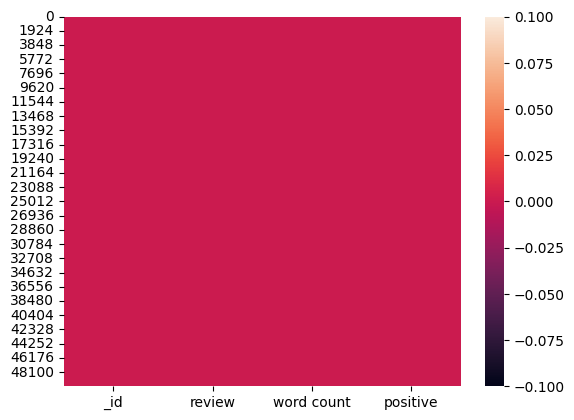

In [9]:
sns.heatmap(reelfeel_df.isnull())

# As no stripes seen on the Heatmap we say that no Null value present for any of the columns

Text(0.5, 1.0, 'Sentiment Distribution')

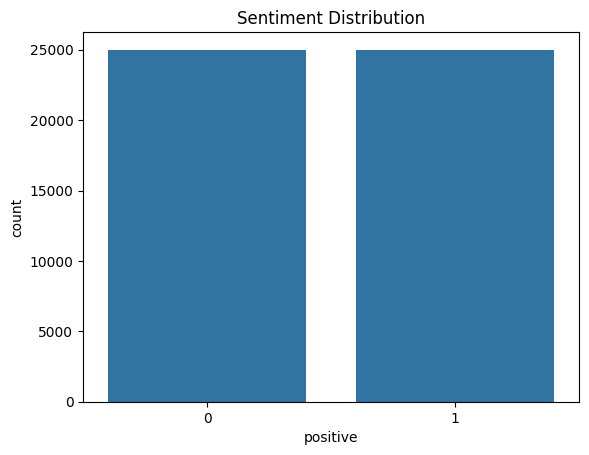

In [11]:
# Performing some EDA

sns.countplot(data=reelfeel_df , x = 'positive')
plt.title("Sentiment Distribution")

Creating Word Count Column

In [12]:
def count_word(text):
 words = text.split()
 word_count = len(words)
 return word_count

reelfeel_df['word count'] = reelfeel_df['review'].map(lambda x: count_word(x))

In [13]:
reelfeel_df.head()

,_id,review,word count,positive
0,66422ae96d5c91bd1d010578,One of the other reviewers has mentioned that ...,307,1
1,66422ae96d5c91bd1d010579,A wonderful little production. <br /><br />The...,162,1
2,66422ae96d5c91bd1d01057a,I thought this was a wonderful way to spend ti...,166,1
3,66422ae96d5c91bd1d01057b,Basically there's a family where a little boy ...,138,0
4,66422ae96d5c91bd1d01057c,"Petter Mattei's ""Love in the Time of Money"" is...",230,1


In [14]:
#Convert updated Dataframe into Dictionary to send it to the datafram

updated_dict = reelfeel_df.to_dict('records') #

#Updating the records into MongoDb

for data in updated_dict:
   reelfeel_collection.update_one({'_id': data['_id']} , {'$set' : data })


In [16]:
#converting sentiment into a numeric data 
# 1 -> Enabled
# 0 -> Disabled

sentiment_vector = pd.get_dummies(reelfeel_df['positive'] , drop_first=True)*1
sentiment_vector.head()

,1
0,1
1,1
2,1
3,0
4,1


In [ ]:
reelfeel_df = pd.concat([reelfeel_df,sentiment_vector] , axis = 1)

In [ ]:
reelfeel_df.drop('sentiment' , axis = 1 , inplace= True)

In [ ]:
updated_dict = reelfeel_df.to_dict('records')

for data in updated_dict:
   reelfeel_collection.update_one({'_id' : data['_id']} , {'$set' :data})

In [ ]:
# Deleting Sentiment Column

reelfeel_collection.update_many({} , {'$unset' : {'sentiment': ""}})

UpdateResult({'n': 50000, 'nModified': 0, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)